### Load the dataset and fasttext

In [1]:
dataset_path = 'backup_dumps/df_whole_dataset_drop_25k'
fasttext_path = 'models/fasttext_model_100epochs_vsize_200'

In [2]:
from joblib import load
df_whole_dataset_drop = load(dataset_path)

Visualizing len of tokens lists.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df_whole_dataset_drop.head(10)

,filename,email_body,file_key,preprocessed_body,tokenized_body,is_phishing
0,20051114.mbox,<html>\n<head>\n<!-- extraneous meta tag rem...,0,ebay suspension fixedstringurl fixedstringurl ...,"[ebay, suspension, fixedstringurl, fixedstring...",True
1,20051114.mbox,"&nbsp;<body bgcolor=#ffffff><div align=""left"">...",1,dear lasalle member as part of our continuing ...,"[dear, lasalle, member, part, continuing, comm...",True
2,20051114.mbox,"&nbsp;<body bgcolor=#ffffff><div align=""left"">...",2,dear lasalle member as part of our continuing ...,"[dear, lasalle, member, part, continuing, comm...",True
3,20051114.mbox,"<html><p><font face=""Arial""><A HREF=""https://w...",3,fixedstringurl i dont pokemon in 1878 in 1874 ...,"[fixedstringurl, dont, pokemon, 1878, 1874, sh...",True
4,20051114.mbox,"\n\n<xbody bgcolor=""#ffffff""><!--Header code s...",4,fixedstringurl fixedstringurl fixedstringurl f...,"[fixedstringurl, fixedstringurl, fixedstringur...",True
5,20051114.mbox,<DIV><DIV><DIV><DIV><DIV><DIV><DIV><DIV><DIV><...,5,fixedstringurl fixedstringurl fixedstringurl f...,"[fixedstringurl, fixedstringurl, fixedstringur...",True
6,20051114.mbox,<DIV><DIV><DIV><DIV><DIV><DIV><DIV><DIV><DIV><...,6,fixedstringurl fixedstringurl fixedstringurl f...,"[fixedstringurl, fixedstringurl, fixedstringur...",True
7,20051114.mbox,<DIV><DIV><DIV><DIV><DIV><DIV><DIV><DIV><DIV><...,7,fixedstringurl fixedstringurl fixedstringurl f...,"[fixedstringurl, fixedstringurl, fixedstringur...",True
8,20051114.mbox,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.01 T...",8,untitled document fixedstringurl urgent safeha...,"[untitled, document, fixedstringurl, urgent, s...",True
9,20051114.mbox,To report spam please visit our site at\nhttp:...,9,to report spam please visit our site at fixeds...,"[report, spam, please, visit, site, fixedstrin...",True


In [15]:
df_whole_dataset_drop['list_len'] = df_whole_dataset_drop['tokenized_body'].apply(len)

In [16]:
df_whole_dataset_drop.head(10)

,filename,email_body,file_key,preprocessed_body,tokenized_body,is_phishing,list_len
0,20051114.mbox,<html>\n<head>\n<!-- extraneous meta tag rem...,0,ebay suspension fixedstringurl fixedstringurl ...,"[ebay, suspension, fixedstringurl, fixedstring...",True,116
1,20051114.mbox,"&nbsp;<body bgcolor=#ffffff><div align=""left"">...",1,dear lasalle member as part of our continuing ...,"[dear, lasalle, member, part, continuing, comm...",True,79
2,20051114.mbox,"&nbsp;<body bgcolor=#ffffff><div align=""left"">...",2,dear lasalle member as part of our continuing ...,"[dear, lasalle, member, part, continuing, comm...",True,79
3,20051114.mbox,"<html><p><font face=""Arial""><A HREF=""https://w...",3,fixedstringurl i dont pokemon in 1878 in 1874 ...,"[fixedstringurl, dont, pokemon, 1878, 1874, sh...",True,6
4,20051114.mbox,"\n\n<xbody bgcolor=""#ffffff""><!--Header code s...",4,fixedstringurl fixedstringurl fixedstringurl f...,"[fixedstringurl, fixedstringurl, fixedstringur...",True,6
5,20051114.mbox,<DIV><DIV><DIV><DIV><DIV><DIV><DIV><DIV><DIV><...,5,fixedstringurl fixedstringurl fixedstringurl f...,"[fixedstringurl, fixedstringurl, fixedstringur...",True,110
6,20051114.mbox,<DIV><DIV><DIV><DIV><DIV><DIV><DIV><DIV><DIV><...,6,fixedstringurl fixedstringurl fixedstringurl f...,"[fixedstringurl, fixedstringurl, fixedstringur...",True,110
7,20051114.mbox,<DIV><DIV><DIV><DIV><DIV><DIV><DIV><DIV><DIV><...,7,fixedstringurl fixedstringurl fixedstringurl f...,"[fixedstringurl, fixedstringurl, fixedstringur...",True,110
8,20051114.mbox,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.01 T...",8,untitled document fixedstringurl urgent safeha...,"[untitled, document, fixedstringurl, urgent, s...",True,156
9,20051114.mbox,To report spam please visit our site at\nhttp:...,9,to report spam please visit our site at fixeds...,"[report, spam, please, visit, site, fixedstrin...",True,130


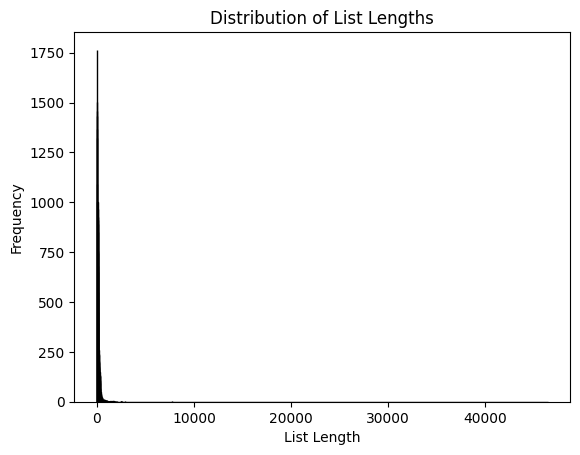

In [19]:
plt.hist(df_whole_dataset_drop['list_len'], bins='auto', edgecolor='black')
plt.xlabel('List Length')
plt.ylabel('Frequency')
plt.title('Distribution of List Lengths')
plt.show()


Checking the max list len, then checking the e-mail body.

In [23]:
max(df_whole_dataset_drop['list_len'])

46436

In [24]:
df_whole_dataset_drop[df_whole_dataset_drop['list_len'] == 46436]

,filename,email_body,file_key,preprocessed_body,tokenized_body,is_phishing,list_len
1336,phishing-2017,"<html>\n\n<table width=""100%"" height="""" align=...",125,security alert fixedstringurl fixedstringurl f...,"[security, alert, fixedstringurl, fixedstringu...",True,46436


Removing it because it have only fixedstringurl tokens.

In [26]:
df_whole_dataset_drop = df_whole_dataset_drop[df_whole_dataset_drop['list_len'] != 46436]

In [27]:
df_whole_dataset_drop.reset_index(inplace=True, drop=True)

In [28]:
df_whole_dataset_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25540 entries, 0 to 25539
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   filename           25540 non-null  object
 1   email_body         25540 non-null  object
 2   file_key           25540 non-null  int64 
 3   preprocessed_body  25540 non-null  object
 4   tokenized_body     25540 non-null  object
 5   is_phishing        25540 non-null  bool  
 6   list_len           25540 non-null  int64 
dtypes: bool(1), int64(2), object(4)
memory usage: 1.2+ MB


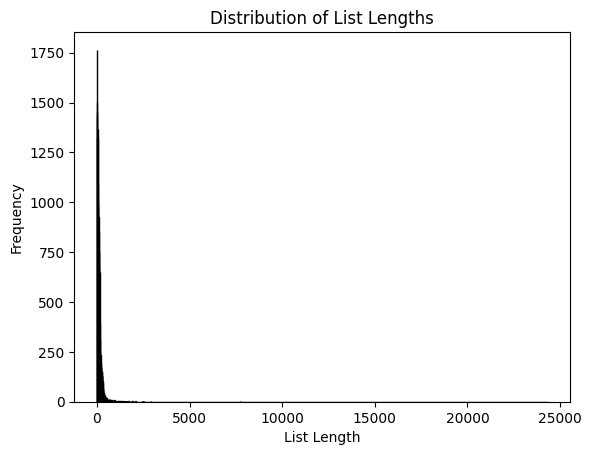

In [29]:
plt.hist(df_whole_dataset_drop['list_len'], bins='auto', edgecolor='black')
plt.xlabel('List Length')
plt.ylabel('Frequency')
plt.title('Distribution of List Lengths')
plt.show()


In [34]:
df_whole_dataset_drop['list_len'].value_counts()

1       316
4       251
13      245
26      244
3       243
       ... 
4255      1
730       1
1395      1
1446      1
1439      1
Name: list_len, Length: 1012, dtype: int64

In [39]:
df_whole_dataset_drop[df_whole_dataset_drop['list_len'] == 1]

,filename,email_body,file_key,preprocessed_body,tokenized_body,is_phishing,list_len
326,20051114.mbox,ahhpzxypoukbgqbifhcgwgrndrrflxknytceghrwwfukoo...,331,ahhpzxypoukbgqbifhcgwgrndrrflxknytceghrwwfukoo...,[ahhpzxypoukbgqbifhcgwgrndrrflxknytceghrwwfuko...,True,1
327,20051114.mbox,ksooykjlrpmcurdybpvyrzncupbhbgjwaiowzleyqafqxq...,332,ksooykjlrpmcurdybpvyrzncupbhbgjwaiowzleyqafqxq...,[ksooykjlrpmcurdybpvyrzncupbhbgjwaiowzleyqafqx...,True,1
328,20051114.mbox,wtrayjsomttyqvrytlmpofnwfuribelkeqklganqxnwemk...,333,wtrayjsomttyqvrytlmpofnwfuribelkeqklganqxnwemk...,[wtrayjsomttyqvrytlmpofnwfuribelkeqklganqxnwem...,True,1
329,20051114.mbox,wpzzjshpsavyzlyqucrydpnsdkcjqtloljcsypuongtpyh...,334,wpzzjshpsavyzlyqucrydpnsdkcjqtloljcsypuongtpyh...,[wpzzjshpsavyzlyqucrydpnsdkcjqtloljcsypuongtpy...,True,1
330,20051114.mbox,yomfeuiwccuoeficnuozhhqekqlgasowxqrxzdcavkihhe...,335,yomfeuiwccuoeficnuozhhqekqlgasowxqrxzdcavkihhe...,[yomfeuiwccuoeficnuozhhqekqlgasowxqrxzdcavkihh...,True,1
...,...,...,...,...,...,...,...
25343,enron_extracted.mbox,\n \n - 1_18_02LO.xls \n,65739,11802loxls,[11802loxls],False,1
25359,enron_extracted.mbox,http://cbs.marketwatch.com/tools/quotes/newsar...,214441,fixedstringurl,[fixedstringurl],False,1
25394,enron_extracted.mbox,Lonsdale\n,244213,lonsdale,[lonsdale],False,1
25463,enron_extracted.mbox,DONE.\nPL\n,140624,done pl,[pl],False,1


In [40]:
df_whole_dataset_drop.nlargest(10, 'list_len')

,filename,email_body,file_key,preprocessed_body,tokenized_body,is_phishing,list_len
24318,enron_extracted.mbox,Enron: A Wake-Up Call\nThe Wall Street Journal...,123619,enron a wakeup call the wall street journal 12...,"[enron, wakeup, wall, street, journal, 120401,...",False,24345
10926,enron_extracted.mbox,"Enron Stock, Bonds Receive More Hits Following...",123623,enron stock bonds receive more hits following ...,"[enron, stock, bonds, receive, hits, following...",False,9909
18464,enron_extracted.mbox,Enron Taps $3 Billion From Bank Lines In Pre-E...,2232,enron taps 3 billion from bank lines in preemp...,"[enron, taps, 3, billion, bank, lines, preempt...",False,8946
16070,enron_extracted.mbox,"Please see the following articles:\n\nSac Bee,...",103349,please see the following articles sac bee fri ...,"[following, articles, sac, bee, fri, 622, empl...",False,8891
493,phishing-2015,%PDF-1.4\r\n%ùúç\r\n4 0 obj\r\n<<\n/E 79946\n...,61,pdf14 4 0 obj e 79946 h 1808 223 l 80244 linea...,"[pdf14, 4, 0, obj, e, 79946, h, 1808, 223, l, ...",True,7709
10429,private-phishing4.mbox,%PDF-1.4\r\n%ùúç\r\n4 0 obj\r\n<<\n/E 79946\n...,3394,pdf14 4 0 obj e 79946 h 1808 223 l 80244 linea...,"[pdf14, 4, 0, obj, e, 79946, h, 1808, 223, l, ...",True,7709
12716,enron_extracted.mbox,"I am pleased to send you the October 15, 2001 ...",24111,i am pleased to send you the october 15 2001 w...,"[pleased, send, october, 15, 2001, webbased, e...",False,7403
944,phishing-2016,%PDF-1.5\r\n%µµµµ\r\n1 0 obj\r\n<</Type/Catalo...,218,pdf15 1 0 obj endobj 2 0 obj endobj 3 0 obj ex...,"[pdf15, 1, 0, obj, endobj, 2, 0, obj, endobj, ...",True,7120
19514,enron_extracted.mbox,See articles #1 & 5.\n\n -----Original Message...,154104,see articles 1 5 original message from schmidt...,"[articles, 1, 5, original, message, schmidt, a...",False,7019
22072,enron_extracted.mbox,"What Now? --- Solutions, Solutions: How Califo...",32398,what now solutions solutions how california mi...,"[solutions, solutions, california, mess, wall,...",False,5993


In [49]:
df_whole_dataset_drop[df_whole_dataset_drop['list_len'] > 20000]

,filename,email_body,file_key,preprocessed_body,tokenized_body,is_phishing,list_len
24318,enron_extracted.mbox,Enron: A Wake-Up Call\nThe Wall Street Journal...,123619,enron a wakeup call the wall street journal 12...,"[enron, wakeup, wall, street, journal, 120401,...",False,24345


In [50]:
df_whole_dataset_drop = df_whole_dataset_drop[df_whole_dataset_drop['list_len'] <= 20000]
df_whole_dataset_drop.reset_index(drop=True, inplace=True)

In [51]:
df_whole_dataset_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25539 entries, 0 to 25538
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   filename           25539 non-null  object
 1   email_body         25539 non-null  object
 2   file_key           25539 non-null  int64 
 3   preprocessed_body  25539 non-null  object
 4   tokenized_body     25539 non-null  object
 5   is_phishing        25539 non-null  bool  
 6   list_len           25539 non-null  int64 
dtypes: bool(1), int64(2), object(4)
memory usage: 1.2+ MB


In [40]:
df_whole_dataset[df_whole_dataset['list_len'] > 3000]


,filename,email_body,file_key,preprocessed_body,tokenized_body,is_phishing,list_len
493,phishing-2015,%PDF-1.4\r\n%ùúç\r\n4 0 obj\r\n<<\n/E 79946\n...,61,pdf14 4 0 obj e 79946 h 1808 223 l 80244 linea...,"[pdf14, 4, 0, obj, e, 79946, h, 1808, 223, l, ...",True,7709
773,phishing-2016,%PDF-1.4\n1 0 obj\n<<\n/Title (þÿ)\n/Creator (...,42,pdf14 1 0 obj title creator producer wkhtmltop...,"[pdf14, 1, 0, obj, title, creator, producer, w...",True,3728
800,phishing-2016,%PDF-1.5\r\n%µµµµ\r\n1 0 obj\r\n<</Type/Catalo...,70,pdf15 1 0 obj endobj 2 0 obj endobj 3 0 obj ex...,"[pdf15, 1, 0, obj, endobj, 2, 0, obj, endobj, ...",True,3542
944,phishing-2016,%PDF-1.5\r\n%µµµµ\r\n1 0 obj\r\n<</Type/Catalo...,218,pdf15 1 0 obj endobj 2 0 obj endobj 3 0 obj ex...,"[pdf15, 1, 0, obj, endobj, 2, 0, obj, endobj, ...",True,7120
946,phishing-2016,%PDF-1.5\r\n%µµµµ\r\n1 0 obj\r\n<</Type/Catalo...,220,pdf15 1 0 obj endobj 2 0 obj endobj 3 0 obj ex...,"[pdf15, 1, 0, obj, endobj, 2, 0, obj, endobj, ...",True,4155
952,phishing-2016,%PDF-1.5\r\n%µµµµ\r\n1 0 obj\r\n<</Type/Catalo...,226,pdf15 1 0 obj endobj 2 0 obj endobj 3 0 obj ex...,"[pdf15, 1, 0, obj, endobj, 2, 0, obj, endobj, ...",True,5763
980,phishing-2016,%PDF-1.5\r\n%µµµµ\r\n1 0 obj\r\n<</Type/Catalo...,254,pdf15 1 0 obj endobj 2 0 obj endobj 3 0 obj ex...,"[pdf15, 1, 0, obj, endobj, 2, 0, obj, endobj, ...",True,3648
1009,phishing-2016,%PDF-1.4\n1 0 obj\n<<\n/Title (þÿ)\n/Creator (...,283,pdf14 1 0 obj title creator producer wkhtmltop...,"[pdf14, 1, 0, obj, title, creator, producer, w...",True,4255
1035,phishing-2016,%PDF-1.5\r\n%µµµµ\r\n1 0 obj\r\n<</Type/Catalo...,309,pdf15 1 0 obj metadata 43 0 rviewerpreferences...,"[pdf15, 1, 0, obj, metadata, 43, 0, rviewerpre...",True,3124
1106,phishing-2016,%PDF-1.4\n1 0 obj\n<<\n/Title (þÿ)\n/Creator (...,382,pdf14 1 0 obj title creator wkhtmltopdf 0123 p...,"[pdf14, 1, 0, obj, title, creator, wkhtmltopdf...",True,4152


In [52]:
from joblib import load, dump
dump(df_whole_dataset_drop, 'backup_dumps\df_whole_dataset_drop_25k_tails')

['backup_dumps\\df_whole_dataset_drop_25k_tails']

Use also pretrained fast text model, from gensim api.

In [22]:
from joblib import load
df_whole_dataset = load('backup_dumps\df_whole_dataset_drop_25k_tails')

In [14]:
import gensim
import gensim.downloader as api
#fasttext_model = gensim.models.Word2Vec.load(fasttext_path)
fasttext_model = gensim.models.fasttext.load_facebook_model('models/cc.en.300.bin/cc.en.300.bin')
#fasttext_wiki = api.load('fasttext-wiki-news-subwords-300') # it has pre-trained vectors but cannot create OOV

In [85]:
api.info()

{'corpora': {'semeval-2016-2017-task3-subtaskBC': {'num_records': -1,
   'record_format': 'dict',
   'file_size': 6344358,
   'reader_code': 'https://github.com/RaRe-Technologies/gensim-data/releases/download/semeval-2016-2017-task3-subtaskB-eng/__init__.py',
   'license': 'All files released for the task are free for general research use',
   'fields': {'2016-train': ['...'],
    '2016-dev': ['...'],
    '2017-test': ['...'],
    '2016-test': ['...']},
   'description': 'SemEval 2016 / 2017 Task 3 Subtask B and C datasets contain train+development (317 original questions, 3,169 related questions, and 31,690 comments), and test datasets in English. The description of the tasks and the collected data is given in sections 3 and 4.1 of the task paper http://alt.qcri.org/semeval2016/task3/data/uploads/semeval2016-task3-report.pdf linked in section “Papers” of https://github.com/RaRe-Technologies/gensim-data/issues/18.',
   'checksum': '701ea67acd82e75f95e1d8e62fb0ad29',
   'file_name': 'se

In [84]:
fasttext_wiki.save('models/fasttext_model_wiki_api')

### Create embeddings outside NN architecture.
Words will be represented as dense vector from word embedding model and passed to Input layer of NN architecture. 

In [8]:
import gensim
fasttext_wiki = gensim.models.KeyedVectors.load('models/fasttext/fasttext_model_wiki_api')

In [9]:
fasttext_wiki.vector_size

300

In [83]:
fasttext_wiki['bruh']

array([-7.2689e-02, -3.7451e-03, -1.7735e-02,  6.1240e-02,  2.0136e-02,
       -1.2527e-02,  5.9027e-02, -4.0174e-02, -4.1760e-02,  2.7092e-02,
       -1.5478e-02,  4.6085e-03, -1.7454e-04,  1.7662e-02,  3.6119e-02,
       -6.9698e-02,  8.8589e-02, -1.5371e-02, -4.3895e-02, -4.4162e-03,
        6.6727e-02, -2.3714e-02,  4.1412e-03, -2.2492e-02,  4.4424e-02,
        6.7950e-02,  5.5755e-02, -4.2416e-02, -2.6825e-02, -4.1010e-02,
        4.7145e-02, -2.7233e-02,  3.2882e-02, -6.8532e-03, -6.0449e-02,
       -3.3489e-02,  6.9201e-02,  1.0009e-01, -6.5248e-02,  9.9531e-02,
        6.1502e-03, -1.2631e-01, -8.9576e-03, -3.9469e-02,  4.9245e-02,
       -5.2469e-02,  9.1201e-03,  8.9547e-03,  1.0021e-02,  2.3559e-02,
        2.1065e-02, -3.4716e-02,  9.4826e-02, -1.0720e-01,  3.0342e-03,
       -3.9566e-02, -3.0573e-02, -2.0393e-02, -5.0705e-02,  5.7777e-02,
       -5.7148e-02, -2.5455e-02,  6.5005e-02, -2.3941e-02, -6.3706e-02,
        2.3286e-02,  2.2176e-02,  5.4701e-02,  7.9461e-03, -6.93

In [59]:
fasttext_wiki.most_similar('click')

[('clicking', 0.7852992415428162),
 ('double-click', 0.7739648222923279),
 ('click-click', 0.7593643069267273),
 ('middle-click', 0.7573902010917664),
 ('clickety', 0.7490958571434021),
 ('.click', 0.738705575466156),
 ('left-click', 0.7372498512268066),
 ('clicked', 0.7320294976234436),
 ('mouse-click', 0.729717493057251),
 ('ctrl-click', 0.7262017726898193)]

In [60]:
fasttext_wiki.most_similar('ebay')

[('Ebay', 0.8523859977722168),
 ('e-bay', 0.7641409039497375),
 ('E-bay', 0.7514503002166748),
 ('eBay', 0.7305548191070557),
 ('ebay.com', 0.7227153778076172),
 ('EBAY', 0.6945925951004028),
 ('E-Bay', 0.6887108087539673),
 ('EBay', 0.6656203269958496),
 ('paypal', 0.657907247543335),
 ('e-Bay', 0.6409375667572021)]

In [10]:
fasttext_wiki['ebay'].size

300

In [19]:
fasttext_model.wv['ebay'].size

300

In [21]:
fasttext_model.wv['phish']

array([-0.22279093, -0.01200477, -0.04308221,  0.07676084, -0.098249  ,
        0.03458016, -0.03137112,  0.0867267 ,  0.0240086 , -0.05146664,
        0.14212014,  0.02305426,  0.12559746,  0.0925948 ,  0.07232889,
        0.06171881,  0.02278443,  0.30307916,  0.10965074,  0.06195397,
       -0.01109775,  0.07247297, -0.10961098,  0.05659331, -0.03668693,
       -0.09928866, -0.16225182, -0.12805675, -0.17424785,  0.25537118,
        0.02946606,  0.10884165,  0.0097094 ,  0.05732377, -0.02269906,
        0.04561239, -0.02326215,  0.02123046,  0.00273496,  0.17367281,
       -0.09935827,  0.07765068, -0.02525058,  0.08238523, -0.07928825,
        0.01755742, -0.05466627,  0.08764821, -0.27605686,  0.18406412,
       -0.07920762, -0.05057072, -0.0238522 , -0.19036584, -0.05304926,
       -0.00453272,  0.02528965, -0.02072868, -0.0542577 , -0.13700138,
        0.10511013,  0.14933936,  0.05485519,  0.02242772, -0.05223944,
        0.11771871, -0.04863161, -0.06115129, -0.03173057, -0.09

So now, for every token in dataset, we will create an embedding vector of size: 300.
We will have a list of lists, every token will be replaced with embedding.
Next, we will ensure fixed size of lists, by padding.

In [23]:
embedded_sequences = [[fasttext_model.wv[token] for token in seq] for seq in df_whole_dataset['tokenized_body']]

In [26]:
len(embedded_sequences)

25539

In [28]:
embedded_sequences[1]

[array([ 0.01924686,  0.03025015, -0.09005377,  0.07715726, -0.01502532,
        -0.00482617,  0.14874585,  0.00586679,  0.00065441, -0.02399126,
        -0.11440539,  0.01099617, -0.04258998, -0.1321918 ,  0.00988349,
         0.0134876 , -0.11026365,  0.0270582 , -0.09793684,  0.1000286 ,
         0.09795248,  0.19259371, -0.0976816 ,  0.00082121,  0.1096813 ,
        -0.04956898,  0.0264733 , -0.05481453, -0.03659599,  0.12353326,
         0.06812351,  0.02136074, -0.05441841,  0.11158399, -0.08183292,
        -0.05120227,  0.00067306, -0.10981182, -0.22830367, -0.05598697,
        -0.06015216,  0.00068753,  0.04943221,  0.1270729 ,  0.00660431,
        -0.01622155,  0.02886222,  0.00027583,  0.05050321, -0.10719157,
        -0.04930126,  0.01515055, -0.09320898, -0.078922  , -0.0557031 ,
        -0.06990547, -0.08600122,  0.17716539,  0.00938842,  0.11718027,
        -0.04696261,  0.03704134, -0.05103561,  0.12518786,  0.04326769,
         0.01343235,  0.02236217,  0.10312065,  0.0

Pad sequences

In [30]:
max_tokens_len = df_whole_dataset['tokenized_body'].apply(len).max()
max_tokens_len

9909

In [32]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [41]:
padded_embedded_sequences = pad_sequences(embedded_sequences, maxlen=1000, dtype='float32', padding='post', value=0.0)

### Create embeddings inside NN architecture.

Embeddings will be created in the embedding layer. Handling OOV is needed especially for FastText, where OOV embeddings can be generated (custom embedding layer needed).

### Create neural network.